**INSTALL PACKAGES AND IMPORT THEM**

In [1]:

# !pip3 install pandas
# !pip3 install numpy
# !pip3 install matplotlib
# !pip3 install seaborn
# !pip3 install scikit-learn
# !pip3 install yellowbrick
# !pip3 install statsmodels

                                              0.0/9.2 MB ? eta -:--:--
                                              0.2/9.2 MB 5.0 MB/s eta 0:00:02
     -                                        0.4/9.2 MB 5.1 MB/s eta 0:00:02
     --                                       0.6/9.2 MB 5.0 MB/s eta 0:00:02
     ---                                      0.9/9.2 MB 5.0 MB/s eta 0:00:02
     ----                                     1.1/9.2 MB 4.9 MB/s eta 0:00:02
     -----                                    1.3/9.2 MB 4.8 MB/s eta 0:00:02
     ------                                   1.5/9.2 MB 4.9 MB/s eta 0:00:02
     -------                                  1.8/9.2 MB 4.9 MB/s eta 0:00:02
     --------                                 2.0/9.2 MB 4.8 MB/s eta 0:00:02
     ---------                                2.2/9.2 MB 4.9 MB/s eta 0:00:02
     ----------                               2.4/9.2 MB 4.9 MB/s eta 0:00:02
     -----------                              2.7/9.2 MB 4.8 MB/s eta 0

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yellowbrick


**LOAD DATA**

In [24]:
def load_data():
  global df
  try: 
    df = pd.read_csv("../data/smoking.csv")
  except FileNotFoundError:
    from google.colab import drive
    drive.mount('/content/drive')
    df=pd.read_csv('/content/drive/MyDrive/MD/Laboratori/Practica 2/data/smoking.csv')

In [25]:
load_data()


In [26]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


**DESCRIPTIVE ANALYSIS BEFORE ANY TRANSFORMATION**

In [27]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,55692.0,NaN,NaN,NaN,27845.5,16077.039933,0.0,13922.75,27845.5,41768.25,55691.0
gender,55692,2,M,35401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,55692.0,NaN,NaN,NaN,44.182917,12.071418,20.0,40.0,40.0,55.0,85.0
height(cm),55692.0,NaN,NaN,NaN,164.649321,9.194597,130.0,160.0,165.0,170.0,190.0
weight(kg),55692.0,NaN,NaN,NaN,65.864936,12.820306,30.0,55.0,65.0,75.0,135.0
waist(cm),55692.0,NaN,NaN,NaN,82.046418,9.274223,51.0,76.0,82.0,88.0,129.0
eyesight(left),55692.0,NaN,NaN,NaN,1.012623,0.486873,0.1,0.8,1.0,1.2,9.9
eyesight(right),55692.0,NaN,NaN,NaN,1.007443,0.485964,0.1,0.8,1.0,1.2,9.9
hearing(left),55692.0,NaN,NaN,NaN,1.025587,0.157902,1.0,1.0,1.0,1.0,2.0
hearing(right),55692.0,NaN,NaN,NaN,1.026144,0.159564,1.0,1.0,1.0,1.0,2.0


**PREPROCESS**

In [28]:
# Drop columns ID and oral because they are uninformative

df.drop(columns=['ID', 'oral'], axis=1, inplace=True)


In [29]:
# Transforming gender and tartar columns to binary columns
df['gender'] = (df['gender'] == 'M').astype(bool)
df['tartar'] = (df['tartar'] == 'Y').astype(bool)
df['dental caries'] = (df['dental caries']).astype(bool)
df['smoking'] = (df['smoking']).astype(bool)

In [30]:
print(df['gender'].value_counts())
print(df['tartar'].value_counts())
df.dtypes


gender
True     35401
False    20291
Name: count, dtype: int64
tartar
True     30940
False    24752
Name: count, dtype: int64


gender                    bool
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
dental caries             bool
tartar                    bool
smoking                   bool
dtype: object

In [31]:
df.isna().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [32]:
# Correlation matrix
df.corr()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
gender,1.000000,-0.290095,0.741556,0.574956,0.419568,0.127424,0.125680,-0.009407,-0.011579,0.167289,...,-0.042525,0.702214,0.015907,0.507249,0.095718,0.167903,0.237270,0.084408,0.055473,0.510340
age,-0.290095,1.000000,-0.479528,-0.324706,-0.026297,-0.195472,-0.192723,0.203993,0.208722,0.134023,...,0.043007,-0.263078,0.029625,-0.106118,0.032576,-0.063937,0.013031,-0.114984,-0.081796,-0.162557
height(cm),0.741556,-0.479528,1.000000,0.675656,0.378902,0.151133,0.155665,-0.078663,-0.078323,0.080585,...,-0.048419,0.539367,0.005128,0.383883,0.041737,0.126511,0.139720,0.079331,0.055513,0.396675
weight(kg),0.574956,-0.324706,0.675656,1.000000,0.822842,0.108433,0.113155,-0.050094,-0.052836,0.266131,...,0.040560,0.492970,0.032566,0.324808,0.120130,0.250634,0.209625,0.073536,0.059921,0.302780
waist(cm),0.419568,-0.026297,0.378902,0.822842,1.000000,0.027458,0.037996,0.023790,0.019286,0.316922,...,0.072817,0.387066,0.045492,0.235024,0.142690,0.252478,0.243141,0.044203,0.046197,0.226259
eyesight(left),0.127424,-0.195472,0.151133,0.108433,0.027458,1.000000,0.354574,-0.046571,-0.048788,-0.019330,...,-0.007257,0.095234,-0.002752,0.071410,-0.007966,0.019326,0.003850,0.003684,0.012532,0.061204
eyesight(right),0.125680,-0.192723,0.155665,0.113155,0.037996,0.354574,1.000000,-0.043877,-0.046623,-0.013720,...,-0.006172,0.096119,-0.013511,0.047608,-0.006921,0.024182,0.012195,0.016359,0.006568,0.063017
hearing(left),-0.009407,0.203993,-0.078663,-0.050094,0.023790,-0.046571,-0.043877,1.000000,0.510095,0.055219,...,-0.016706,-0.026116,0.014527,0.003349,0.018074,0.004820,0.012864,-0.016100,-0.035396,-0.023209
hearing(right),-0.011579,0.208722,-0.078323,-0.052836,0.019286,-0.048788,-0.046623,0.510095,1.000000,0.049095,...,-0.015426,-0.030943,0.019461,0.008060,0.009393,-0.005081,0.009245,-0.016376,-0.026698,-0.018855
systolic,0.167289,0.134023,0.080585,0.266131,0.316922,-0.019330,-0.013720,0.055219,0.049095,1.000000,...,0.016569,0.186514,0.046170,0.072288,0.083204,0.094893,0.165724,0.029894,0.006542,0.073109


Text(0.5, 1.0, 'Correlation Heatmap')

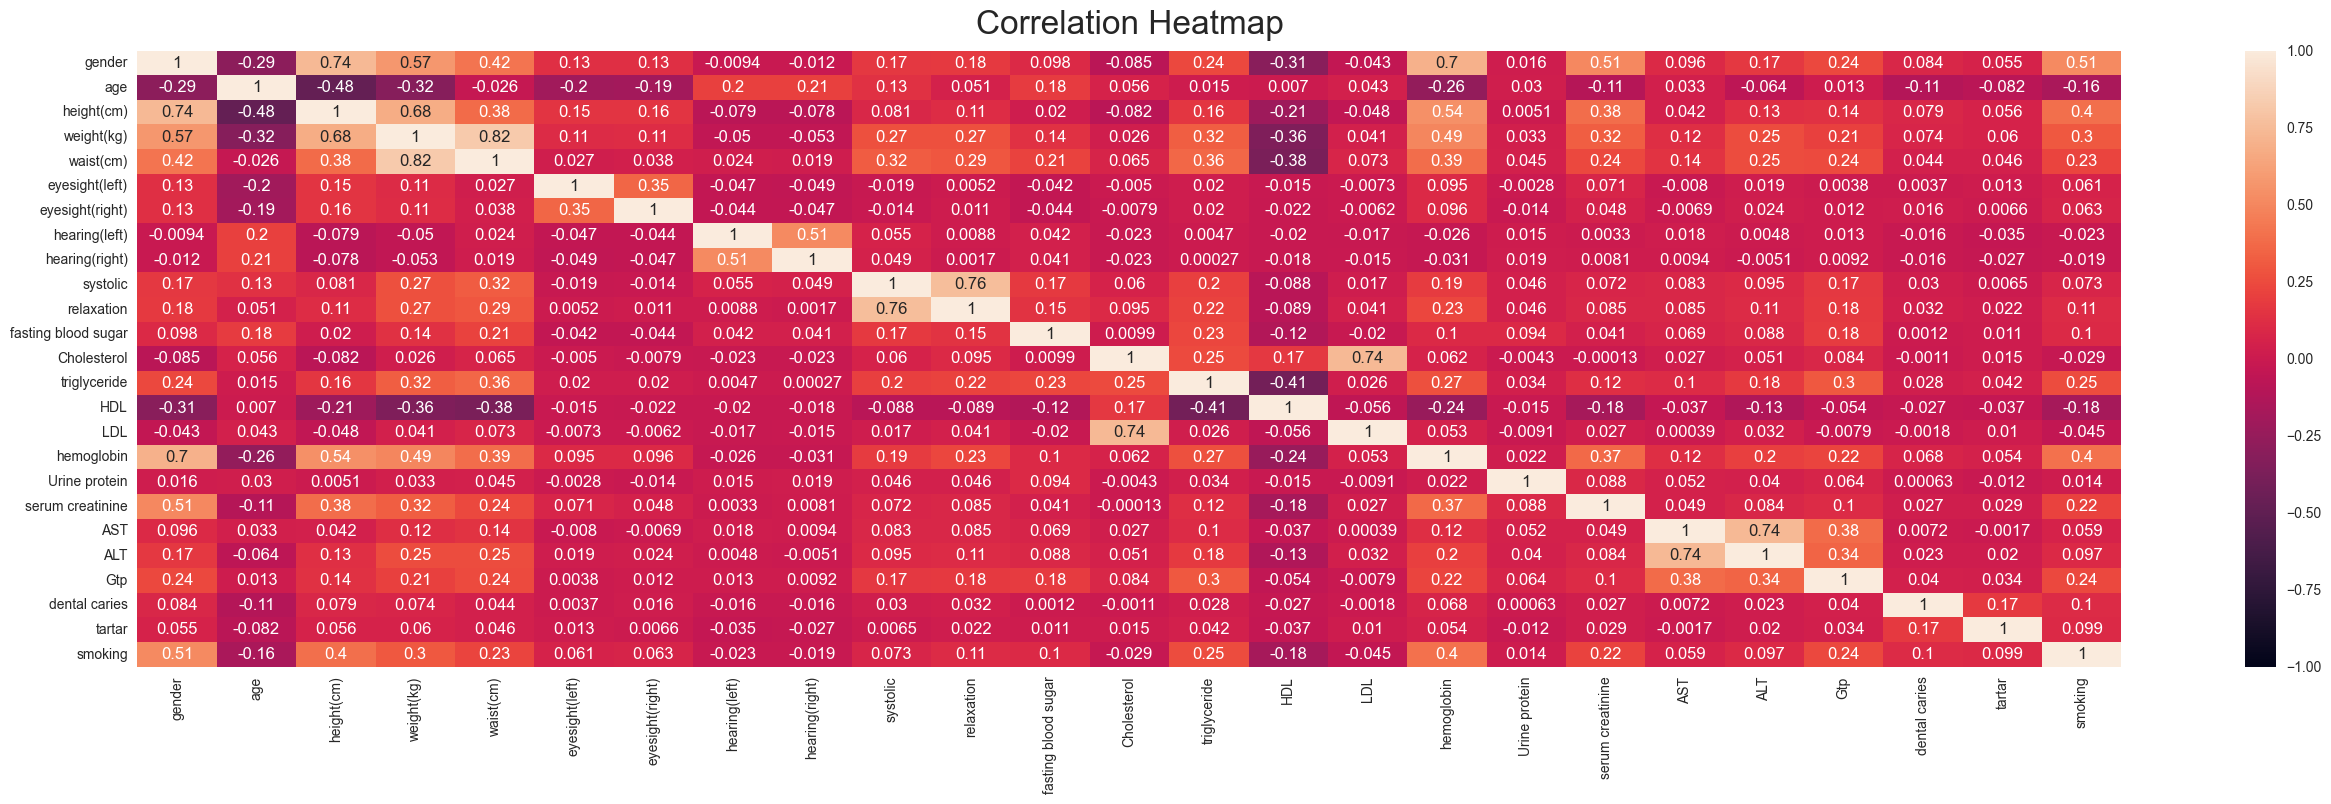

In [33]:
# Increase the size of the heatmap.
plt.figure(figsize=(32, 8))
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':24}, pad=12)

In [34]:
# In order to not have multicollinearity we drop the features that are highly correlated.
# If not, it could become difficult to determine the independent effect of each variable on the target variable.
corr_matrix = df.corr().abs() 
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > 0.7:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))
print(high_corr_pairs)



[('height(cm)', 'gender'), ('waist(cm)', 'weight(kg)'), ('relaxation', 'systolic'), ('LDL', 'Cholesterol'), ('hemoglobin', 'gender'), ('ALT', 'AST')]


In [35]:
# We decided to drop columns: waist, relaxation, LDL, gender, AST to avoid multicollinearity problem 
print(df.columns)
df.drop(['waist(cm)', 'relaxation', 'LDL', 'gender', 'AST'], axis = 1, inplace=True)
df.columns

Index(['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'tartar',
       'smoking'],
      dtype='object')


Index(['age', 'height(cm)', 'weight(kg)', 'eyesight(left)', 'eyesight(right)',
       'hearing(left)', 'hearing(right)', 'systolic', 'fasting blood sugar',
       'Cholesterol', 'triglyceride', 'HDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'ALT', 'Gtp', 'dental caries', 'tartar', 'smoking'],
      dtype='object')

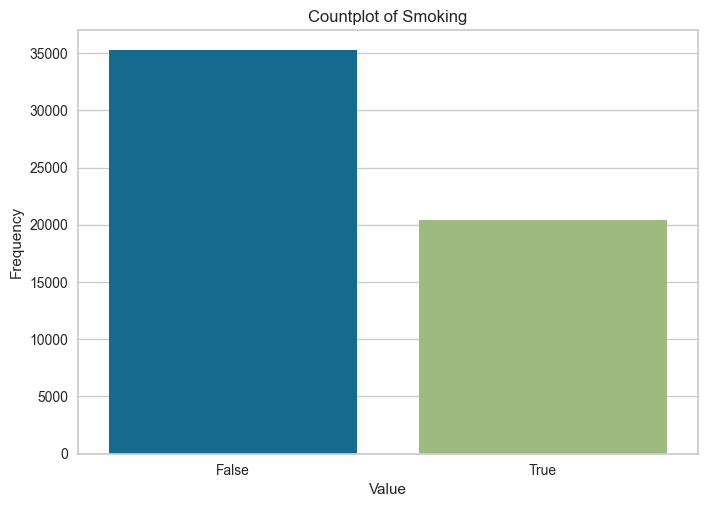

In [36]:
# Before applying any model we checked if our data is well balanced
sns.countplot(x='smoking', data=df)
plt.title('Countplot of Smoking')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# # Create a density plot of the data
# sns.kdeplot(df['smoking'], shade=True)
# plt.title('Density Plot of Smoking')
# plt.xlabel('Value')
# plt.ylabel('Density')
# plt.show()

# # Create a violin plot of the data
# sns.violinplot(x=df['smoking'])
# plt.title('Violin Plot of Smoking')
# plt.xlabel('Value')
# plt.ylabel('Boolean Value')
# plt.show()


Index(['age', 'height(cm)', 'weight(kg)', 'eyesight(left)', 'eyesight(right)',
       'hearing(left)', 'hearing(right)', 'systolic', 'fasting blood sugar',
       'Cholesterol', 'triglyceride', 'HDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'ALT', 'Gtp', 'dental caries', 'tartar', 'smoking'],
      dtype='object')


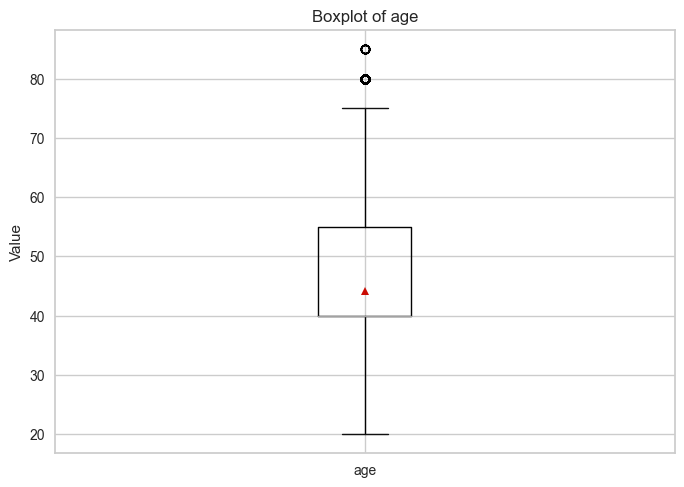

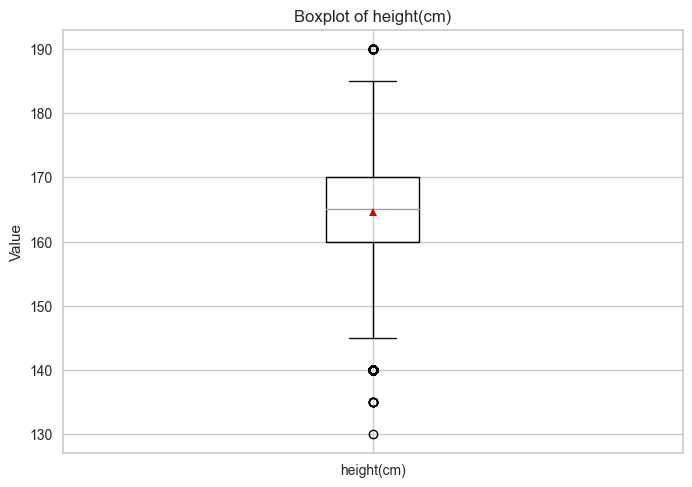

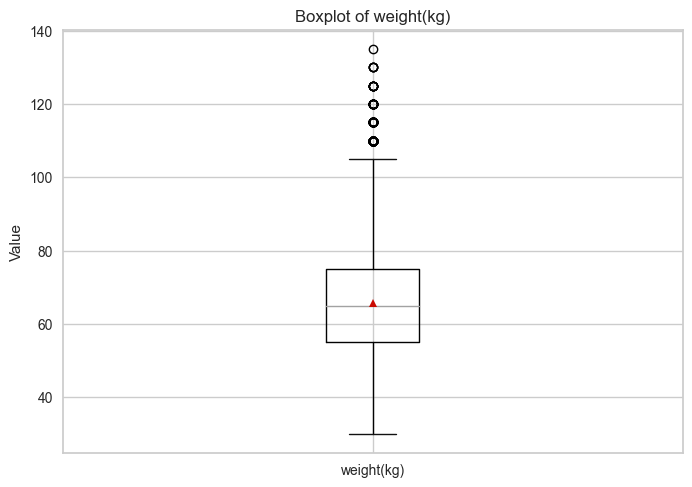

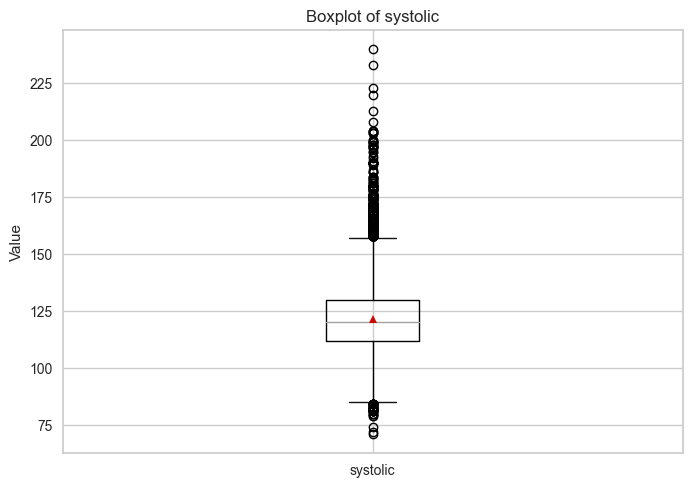

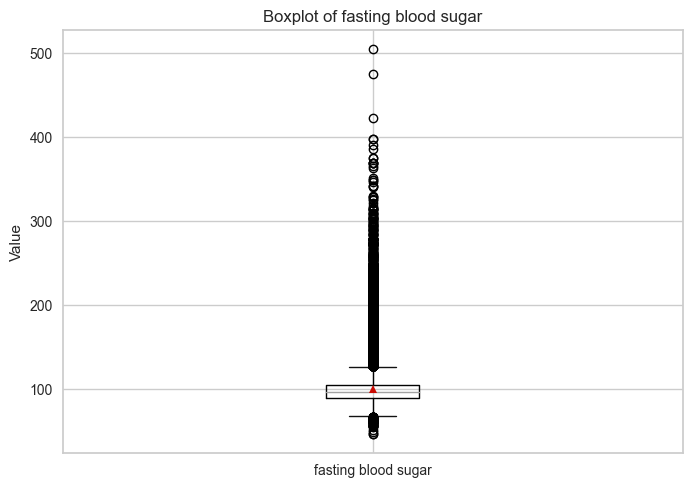

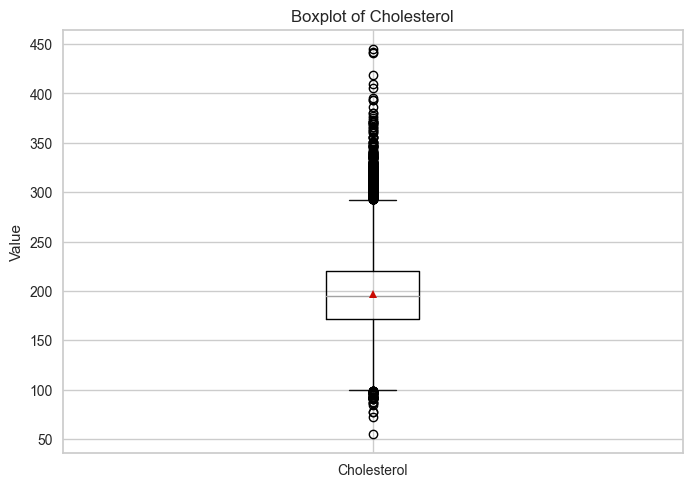

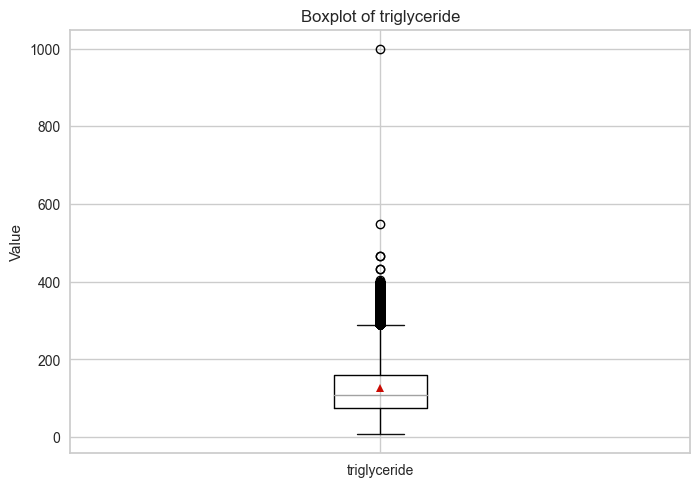

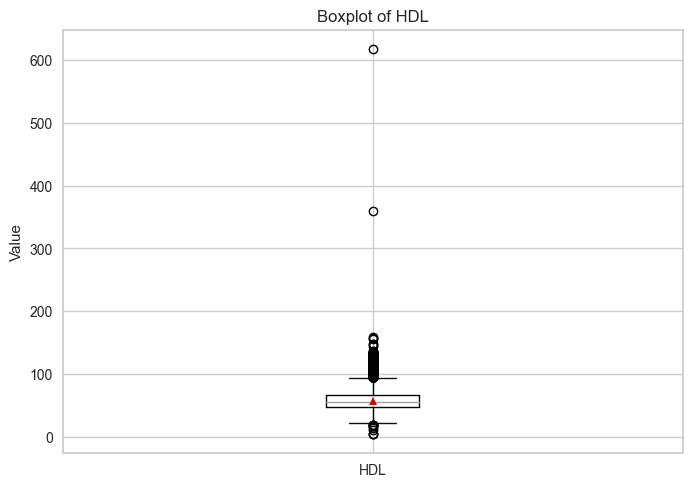

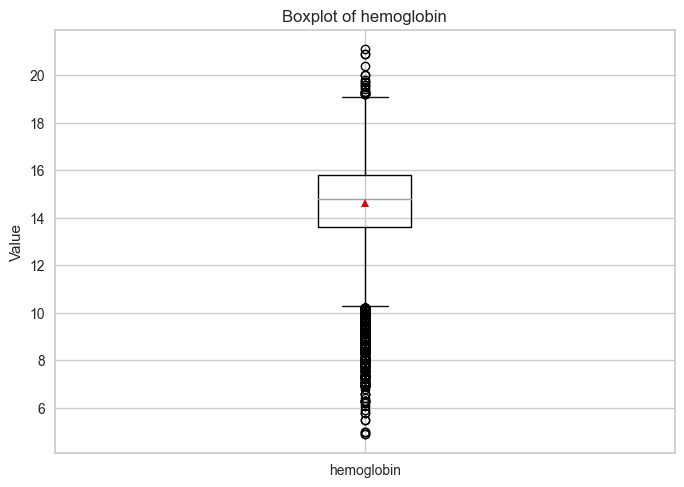

In [37]:
print(df.columns)
# Boxplots: jo faria:
cols1 = ['age', 'height(cm)', 'weight(kg)','systolic', 'fasting blood sugar', 'Cholesterol','triglyceride', 'HDL', 'hemoglobin']
for col in cols1:
    bx = df.boxplot(column=col, meanline=False, showmeans=True, return_type='dict')
    plt.title('Boxplot of ' + col)
    plt.ylabel('Value')
    plt.show()

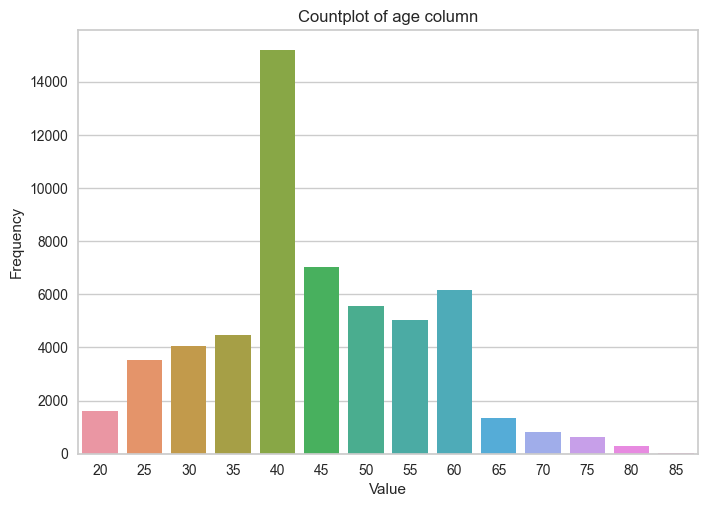

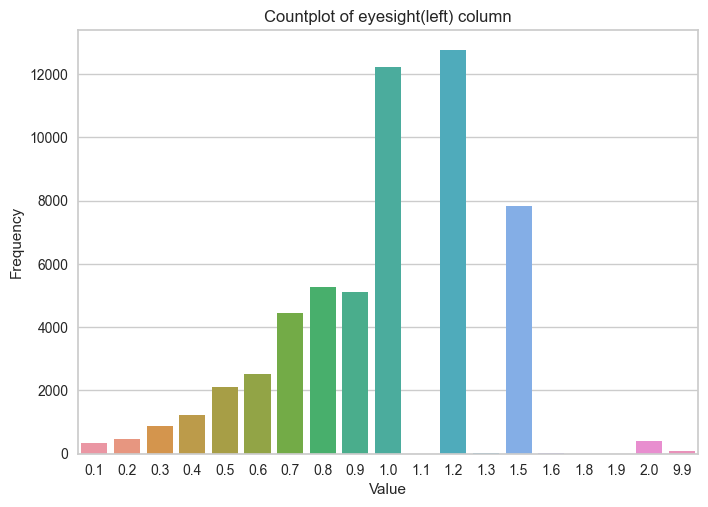

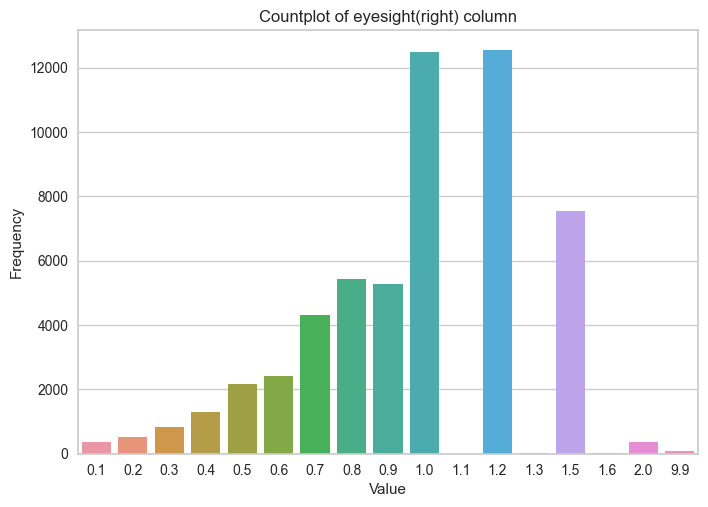

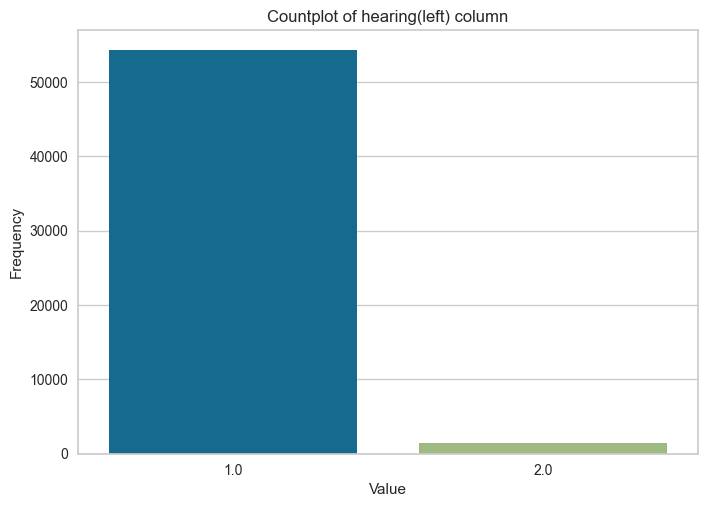

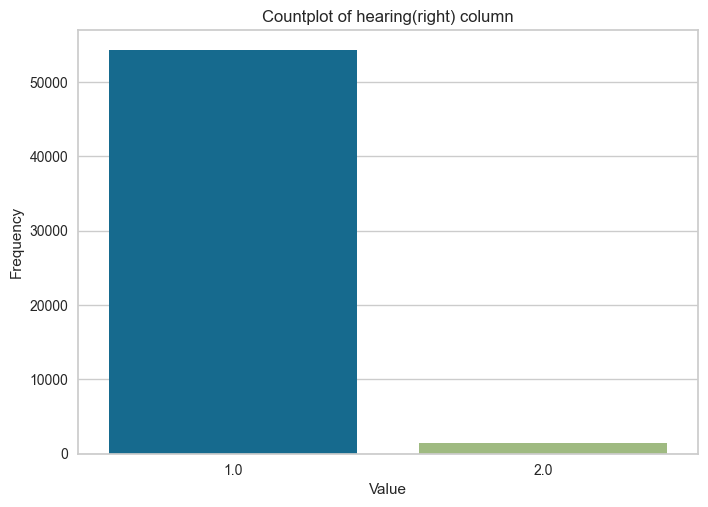

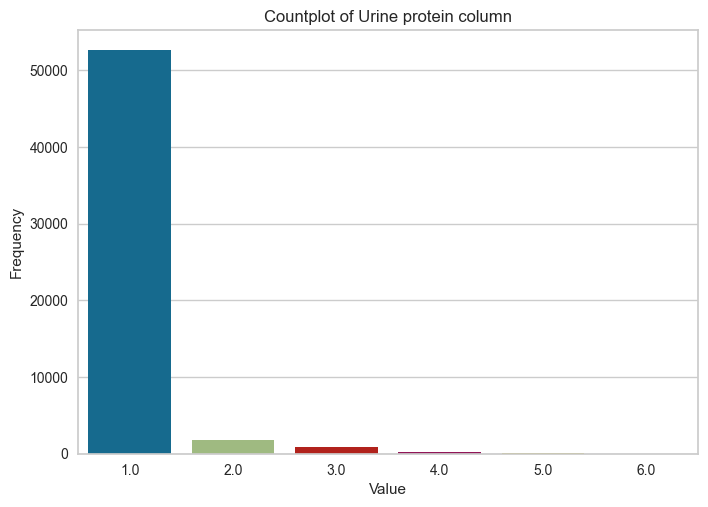

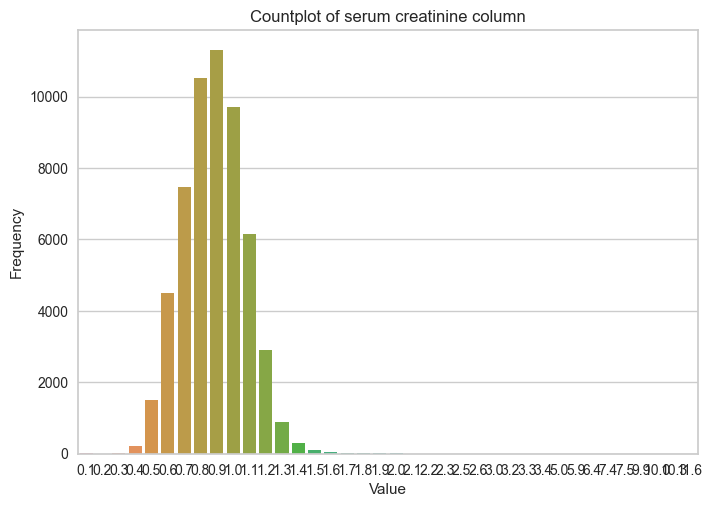

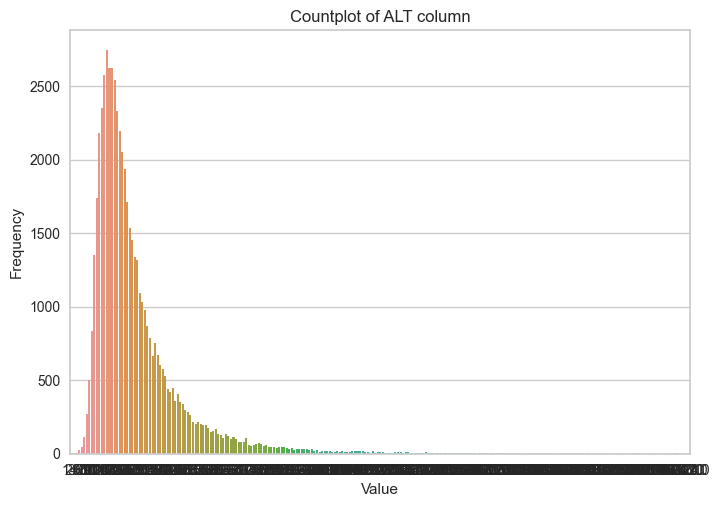

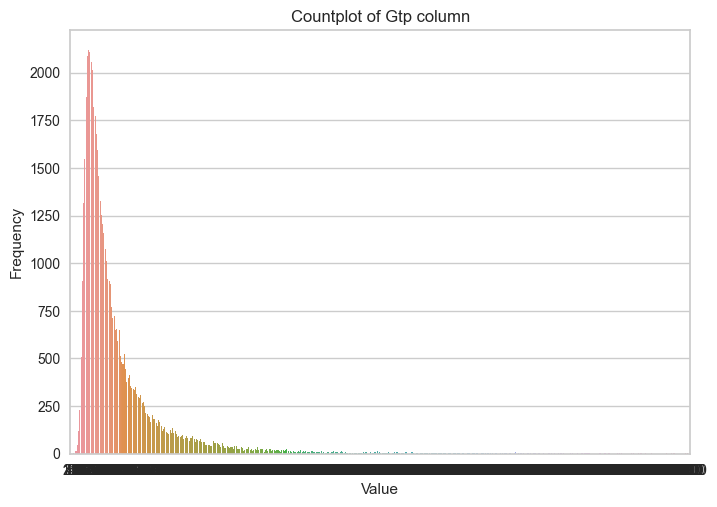

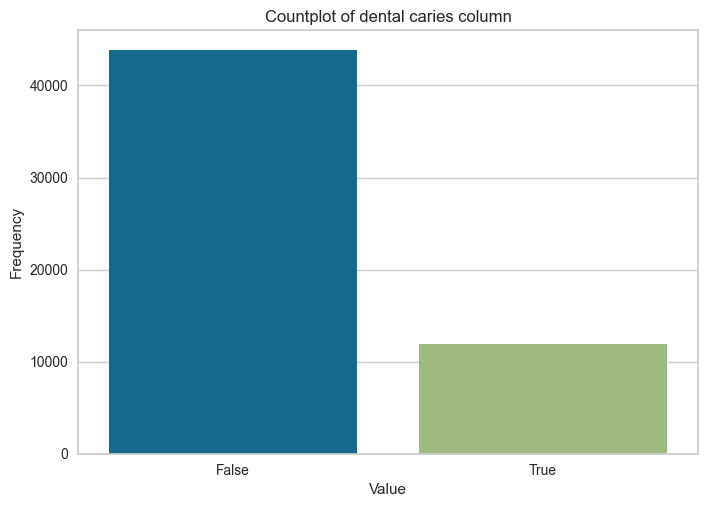

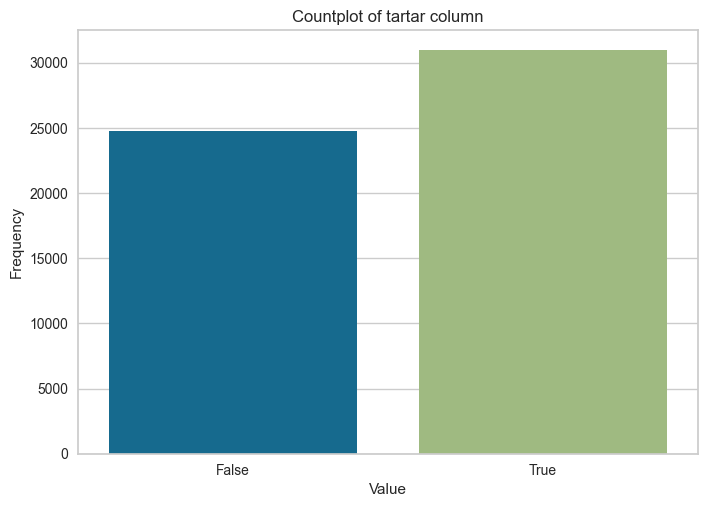

In [38]:
# Histograms 
cols2 = ['age', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 'Urine protein','serum creatinine', 'ALT', 'Gtp', 'dental caries', 'tartar']
for col in cols2:
    sns.countplot(x=col, data=df)
    plt.title('Countplot of ' + col +' column')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [39]:
# Identifying outliers: 1.736 instances
for col in df.columns:
    filtered_df = df[col] > df[col].mean() + 2 * df[col].std()

outliers_instances = df[df.age > df.age.mean() + 2 * df.age.std()].index.to_list()
print('The index numbers identified as outliers are:', outliers_instances)

# We initially thought to keep some outliers that could be interesting to analyse as systolic feature among others 
# and to drop the ones related to hearing or eyesight, but the instances were the same. So we keep the old dataframe
# to check if outliers could give some information or only create noise. 

df_old = df
df = df.drop(outliers_instances)

print(len(df))
print(len(df_old))


The index numbers identified as outliers are: [44, 111, 138, 139, 230, 239, 302, 303, 312, 494, 551, 565, 600, 604, 689, 720, 794, 798, 804, 813, 817, 818, 900, 952, 954, 1003, 1053, 1060, 1112, 1126, 1131, 1140, 1142, 1216, 1219, 1245, 1259, 1277, 1347, 1381, 1383, 1391, 1395, 1485, 1538, 1554, 1565, 1586, 1628, 1708, 1739, 1822, 1829, 1830, 1850, 1858, 1869, 1870, 1882, 1893, 1946, 2003, 2061, 2068, 2093, 2172, 2201, 2269, 2380, 2388, 2556, 2599, 2612, 2628, 2657, 2677, 2687, 2702, 2732, 2738, 2746, 2798, 2828, 2850, 2908, 2911, 2920, 2932, 2943, 2980, 3019, 3038, 3052, 3075, 3112, 3202, 3204, 3247, 3323, 3325, 3330, 3346, 3368, 3402, 3425, 3434, 3475, 3478, 3479, 3481, 3509, 3585, 3592, 3601, 3623, 3677, 3709, 3723, 3750, 3801, 3813, 3948, 4011, 4091, 4123, 4171, 4194, 4201, 4250, 4304, 4316, 4342, 4402, 4483, 4543, 4544, 4568, 4579, 4595, 4621, 4660, 4668, 4736, 4738, 4756, 4795, 4815, 4819, 4837, 4882, 4905, 4909, 4931, 5009, 5015, 5110, 5133, 5134, 5164, 5183, 5210, 5241, 5246, 5

**SAVING PROCESSED DATAFRAME TO CSV**

In [21]:
df.to_csv('preprocessed.csv', index = False)